> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [4]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
TMDb_movie = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
TMDb_movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Let's investigate more about data

In [6]:
TMDb_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

From the table above, there are totally 10866 entries and total 21 columns. And there exists some null value in the cast, director, overview and genres columns. But some columns are with a lot of null value rows like homepage, tagline, keywords and production_companies, and they're are even not necessary for answering the question, so I decide to drop these columns on the stage.

In [7]:
TMDb_movie.duplicated().sum()

1

So there is a duplicate row and I will remove it later in the data cleaning part

In [8]:
TMDb_movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


As you can see, there are lots of movies where the budget or revenue have a value of '0' which means that the values of those variables of those movies has not been recorded. Calculating the profits of these movies would lead to inappropriate results. I will remove these values during the data cleaning phase.


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


1. We need to remove unused column such as id, imdb_id, vote_count, production_company, keywords, homepage etc.
2. Removing the duplicacy in the rows.
3. Some movies in the database have zero budget or zero revenue, that is there value has not been recorded so we will be discarding such entries
4. Replacing zero with NAN in runtime column.

First, according to the previous decision, let's drop unncessary columns : id, imdb_id, budget_adj, revenue_adj, homepage, keywords, overview, production_companies, vote_count, vote_average, release_date

In [9]:
unncessary_col = ['id', 'imdb_id', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'tagline', 'release_date']
TMDb_movie.drop(unncessary_col, axis=1, inplace=True)
TMDb_movie.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015


Remove duplicates

In [10]:
TMDb_movie.drop_duplicates(inplace=True)
TMDb_movie.duplicated().sum()

0

Then, replace zero values with null values in the budget and revenue column and drop the nan value

In [11]:
# group revenue and budget column
bu_re =['budget', 'revenue']

#first convert the zero value to NAN value for easy access next step
#this will replace all the value from '0' to NAN in the list
TMDb_movie[bu_re] = TMDb_movie[bu_re].replace(0, np.nan)

#Removing all the row which has NaN value in temp 
TMDb_movie.dropna(subset = bu_re, inplace = True)

In [12]:
TMDb_movie.shape

(3854, 12)

Replacing zero with NAN in runtime column

In [13]:
TMDb_movie['runtime'] = TMDb_movie['runtime'].replace(0, np.nan)

In [13]:
TMDb_movie.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015


In [14]:
TMDb_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            3854 non-null   float64
 1   budget                3854 non-null   float64
 2   revenue               3854 non-null   float64
 3   original_title        3854 non-null   object 
 4   cast                  3850 non-null   object 
 5   director              3853 non-null   object 
 6   runtime               3854 non-null   int64  
 7   genres                3854 non-null   object 
 8   production_companies  3808 non-null   object 
 9   vote_count            3854 non-null   int64  
 10  vote_average          3854 non-null   float64
 11  release_year          3854 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 391.4+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### 1. Which year has the highest release of movies?

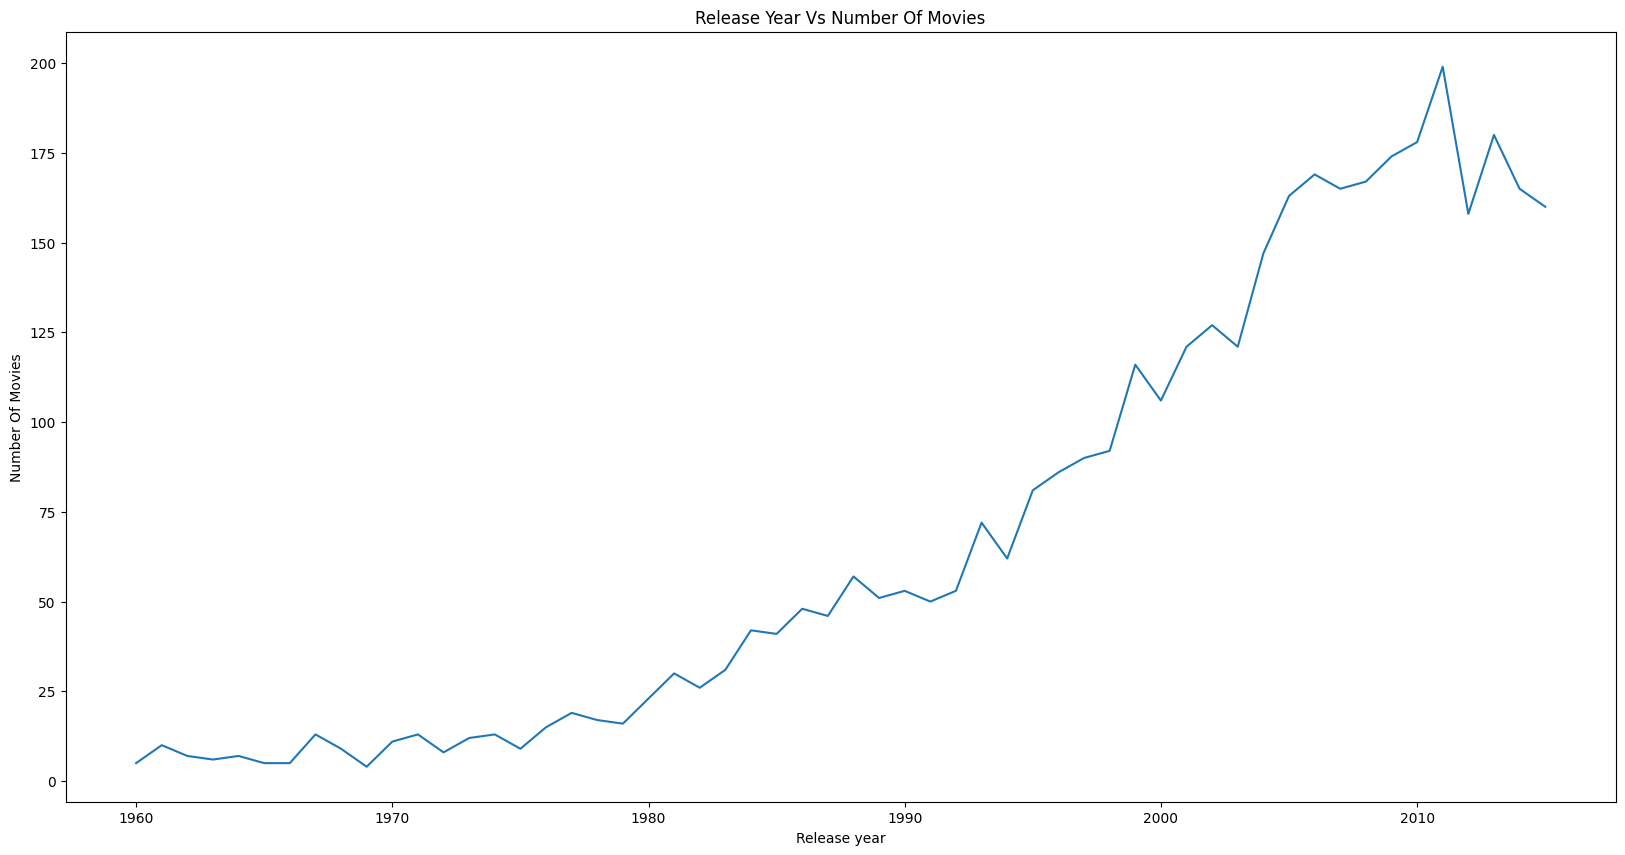

In [15]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

#make group of the data according to their release year and count the total number of movies in each year and plot
data=TMDb_movie.groupby('release_year').count()['original_title']
data.plot(figsize=(20,10))

#set the labels
plt.title("Release Year Vs Number Of Movies")
plt.xlabel('Release year')
plt.ylabel('Number Of Movies')
sns.set_style("darkgrid")

In [16]:
data.sort_values(ascending=False).head(3)

release_year
2011    199
2013    180
2010    178
Name: original_title, dtype: int64

After Seeing the plot and the output we can conclude that year 2011 year has the highest release of movies (199) followed by year 2013 (180) and year 2010 (178)

### 2. What is the relationship between popularity and revenue in profitable movies?

Correlation Between Popularity And Revenue :  0.6155346545546608


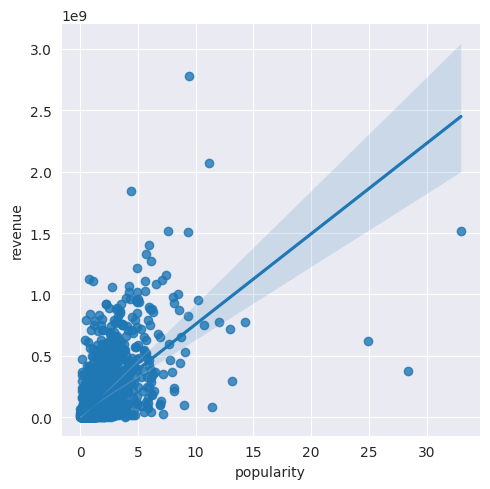

In [19]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
sns.lmplot(x='popularity', y='revenue', data=TMDb_movie)
data_corr = TMDb_movie.corr(numeric_only=True)
print("Correlation Between Popularity And Revenue : ",data_corr.loc['popularity','revenue'])

Here we can find that Popularity increases will increase Revenue

### 3. What is the relationship between rating and revenue in profitable movies?

Correlation Between Rating And Revenue :  0.22712277570168407


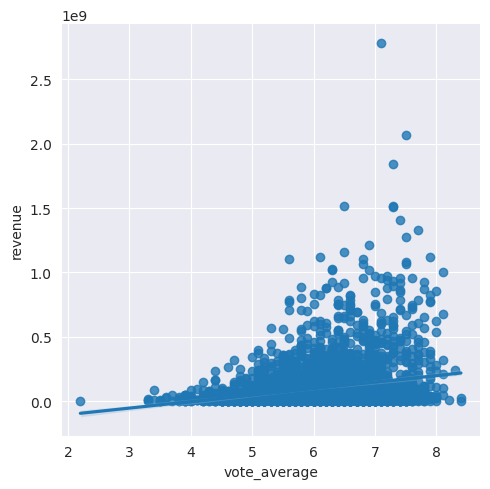

In [20]:
sns.lmplot(x='vote_average', y='revenue', data=TMDb_movie)
print("Correlation Between Rating And Revenue : ",data_corr.loc['vote_average','revenue'])

Here we can find that Rating increases will increase Revenue

### 4. What is the relationship between rating and popularity in profitable movies?

Correlation Between Rating And Popularity :  0.31786616572270426


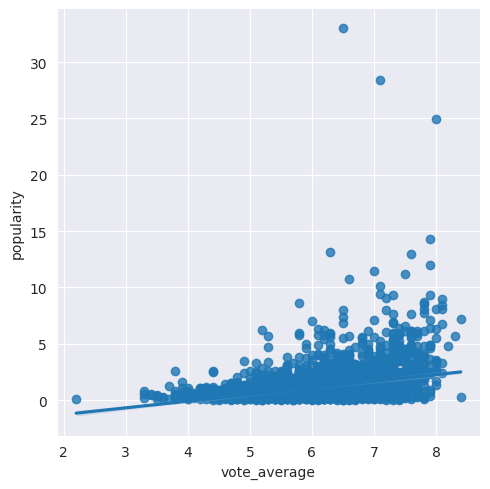

In [21]:
sns.lmplot(x='vote_average', y='popularity', data=TMDb_movie)
print("Correlation Between Rating And Popularity : ",data_corr.loc['vote_average','popularity'])

Here we can find that Rating increases will increase Popularity 

### 5. Average Runtime Of Movies From Year To Year?

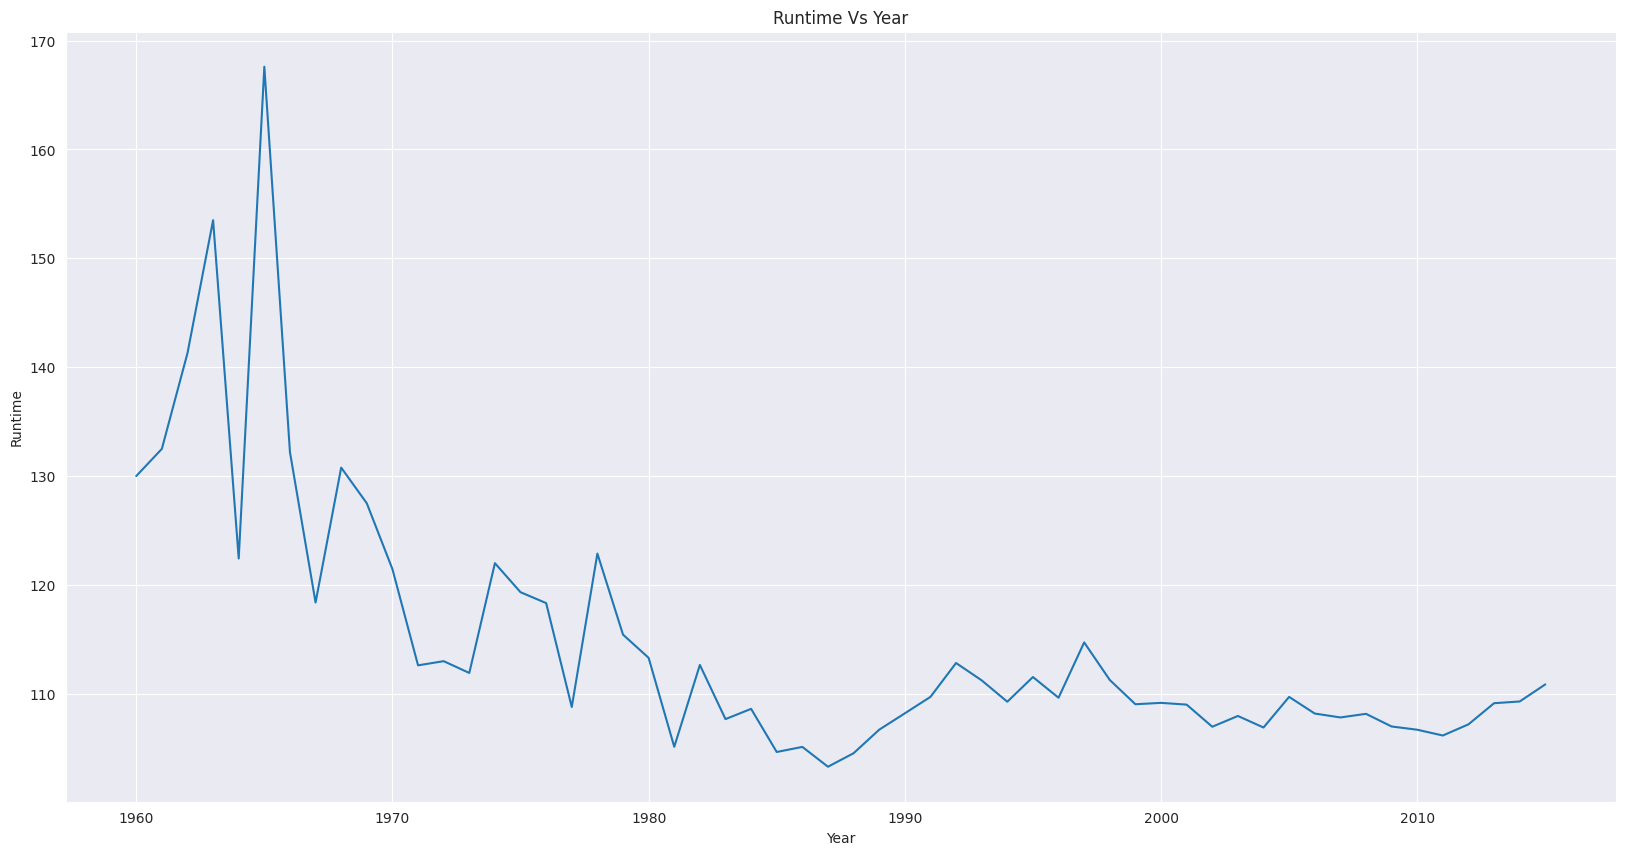

In [23]:
#make the group of the data according to their release_year and find the mean of runtime related to this and plot.
TMDb_movie.groupby('release_year').mean(numeric_only=True)['runtime'].plot(figsize=(20,10))

#setup the title and label of the ploy
plt.title("Runtime Vs Year")
plt.xlabel('Year')
plt.ylabel('Runtime')
sns.set_style("darkgrid")

According to the plot movie duration is decreasing year to year and it's TRUE. Because at this time nobody want to watch the long duration movies because it is quite boring. That's why the average runtime duraion of the movies are arround 100 Minutes.

### 6. Average Budget Of Movies From Year To Year?

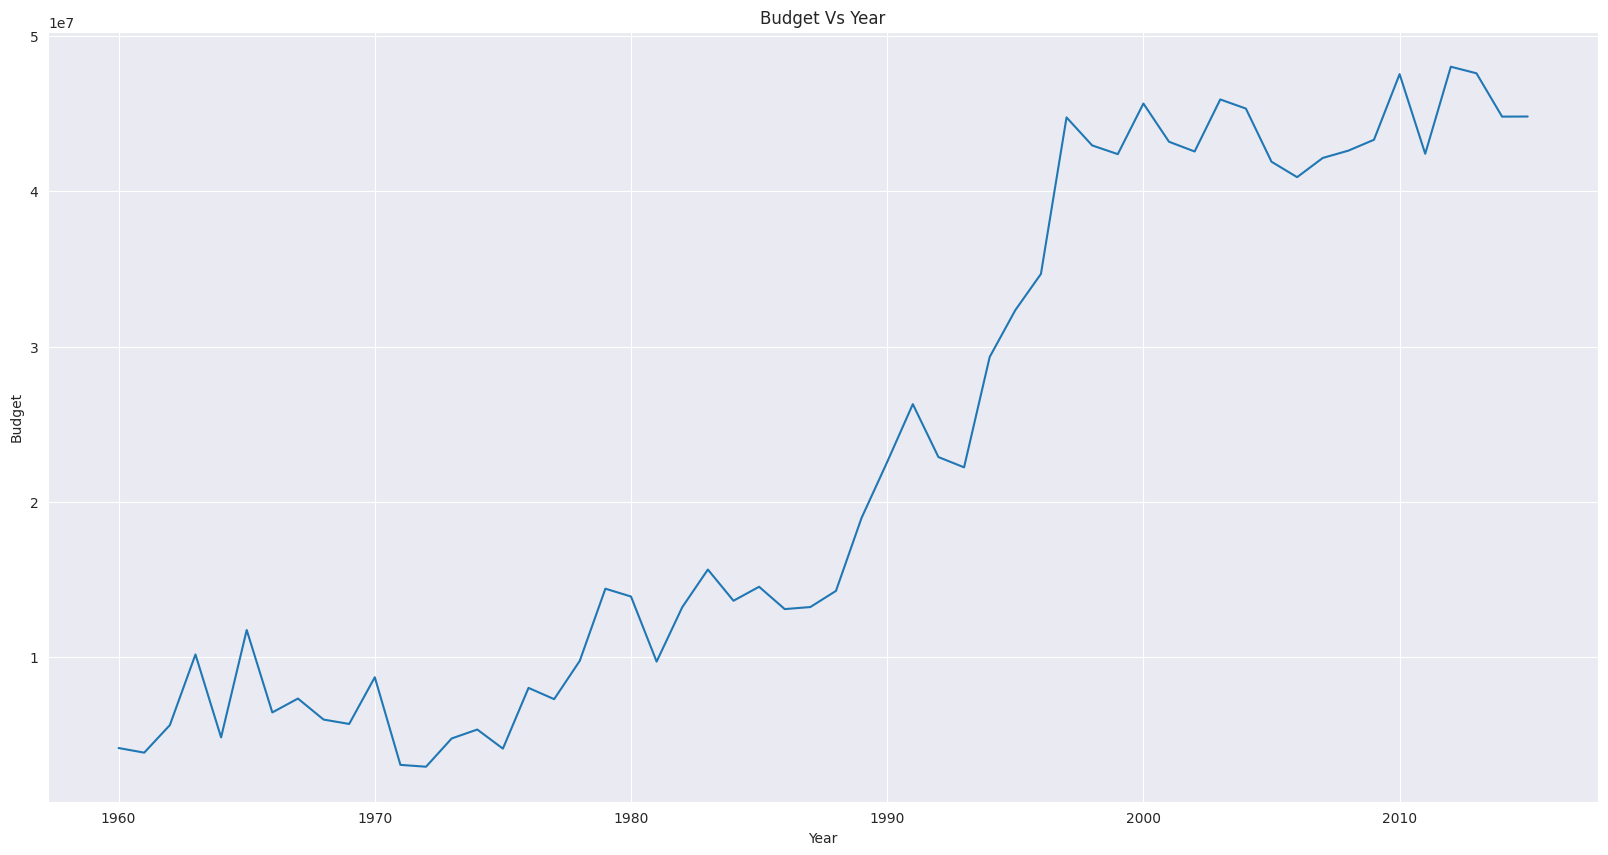

In [25]:
#make the group of the data according to their release_year and find the mean of budget related to this and plot.
TMDb_movie.groupby('release_year').mean(numeric_only=True)['budget'].plot(figsize=(20,10))

#setup the title and label of the ploy
plt.title("Budget Vs Year")
plt.xlabel('Year')
plt.ylabel('Budget')
sns.set_style("darkgrid")

The budget to produce a movie is increasing year to year

### 7. Which Genres Has The Highest Release Of Movies?

In [26]:
def split_count_data(i):
    data_plot = TMDb_movie[i].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    return data

In [27]:
genres = split_count_data("genres")

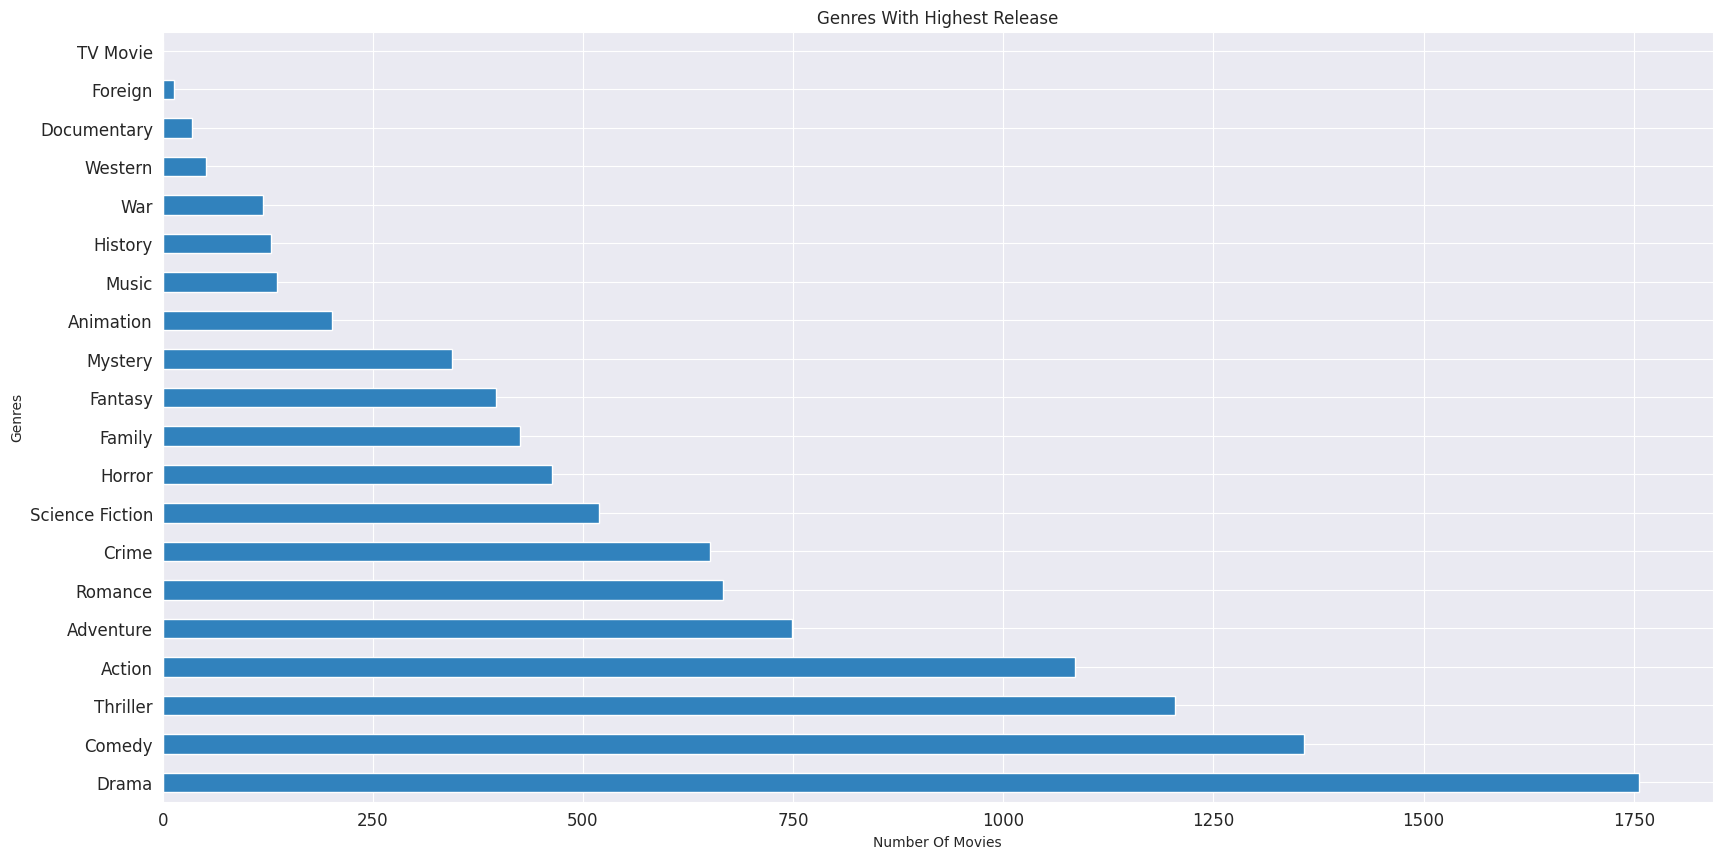

In [28]:
genres_count=genres.value_counts()

genres_count.plot(kind= 'barh',figsize = (20,10),fontsize=12,colormap='tab20c')

#setup the title and the labels of the plot.
plt.title("Genres With Highest Release")
plt.xlabel('Number Of Movies')
plt.ylabel("Genres")
sns.set_style("darkgrid")

Drama is the most popular genre, following by comedy, thriller and action.
Drama, Comedy, Thriller and Action are four most-made genres.

### 8. Which Cast Has The Highest Release Of Movies?

In [29]:
cast = split_count_data("cast")

In [30]:
cast_count=cast.value_counts()

cast_count.sort_values(ascending=False).head()

Robert De Niro       52
Bruce Willis         46
Samuel L. Jackson    44
Nicolas Cage         43
Matt Damon           36
dtype: int64

Robert De Niro has the hightest release of movies, following by Bruce Willis, Samuel L. Jackson and Nicolas Cage.

### 9. Which Production Company Has The Highest Release Of Movies?

In [31]:
production_company = split_count_data("production_companies")

In [32]:
production_company_count=production_company.value_counts()

production_company_count.sort_values(ascending=False).head()

Universal Pictures                        329
Warner Bros.                              324
Paramount Pictures                        270
Twentieth Century Fox Film Corporation    201
Columbia Pictures                         178
dtype: int64

Universal Pictures is the most popular production companies, following by Warner Bros., Paramount Pictures and Twentieth Century Fox Film Corporation.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

# Conclusions:

1. Maximum Number Of Movies Release In year 2011
2. Movies with higher popularity have shown a corresponding increase in revenue
3. Movies with higher rating have shown a corresponding increase popularity
4. Movies with higher rating have shown a corresponding increase in the revenue
5. Average runtime of the movies are decreasing year by year.
6. Average budget of the movies are increasing year by year.
7. Drame, Comedy, Thriller and Action are four most-made genres
8. Robert De Niro has the hightest release of movies, following by Bruce Willis, Samuel L. Jackson and Nicolas Cage.
9. Universal Pictures is the most popular production companies, following by Warner Bros., Paramount Pictures and Twentieth Century Fox Film Corporation.


## Limitations:

1. During the data cleaning process, I split the data seperated by '|' into lists for easy parsing during the exploration phase. This increases the time taken in calculating the result.
2. Dropping or discarding the rows with missing values in our case is zero value also affected the overall analysis

In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] Writing 621173 bytes to Investigate_a_Dataset.html


0